In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ml-olympiad-sustainable-urban-living/sample_submission.csv
/kaggle/input/ml-olympiad-sustainable-urban-living/train.csv
/kaggle/input/ml-olympiad-sustainable-urban-living/test.csv


In [2]:
df_house = pd.read_csv("/kaggle/input/ml-olympiad-sustainable-urban-living/train.csv")

In [3]:
df_house.head(30)

,Id,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
0,0x21e3,Apartment,106,NaN,1,Semi_Furnished,0.0,No,Once in a day - Morning,5.89,Slightly below average,Medium,90.0,3.86,71.98
1,0x68d4,Apartment,733,2.0,2,Unfurnished,1.0,No,Once in a day - Evening,4.37,Well below average,Medium,96.0,3.55,71.20
2,0x7d81,Apartment,737,4.0,2,Fully Furnished,0.0,No,Once in a day - Morning,7.45,Slightly below average,Medium,121.0,3.81,71.39
3,0x7a57,Apartment,900,3.0,2,Unfurnished,2.0,Yes,Once in a day - Morning,6.16,Well above average,Medium,100.0,1.34,31.46
4,0x9409,Bungalow,2238,14.0,6,Fully Furnished,0.0,No,All time,5.46,Well below average,Medium,116.0,4.77,93.70
5,0xbe4e,Single-family home,1185,3.0,3,Unfurnished,0.0,No,Once in a day - Morning,5.69,Well below average,Medium,91.0,4.49,82.94
6,0xe2a,Single-family home,1779,3.0,3,Semi_Furnished,0.0,No,Once in a day - Evening,7.43,NaN,Medium,100.0,2.90,74.88
7,0x2ea5,Duplex,1281,5.0,2,Semi_Furnished,3.0,No,All time,7.72,Well above average,Medium,143.0,0.96,28.54
8,0x7a83,Apartment,268,1.0,3,Semi_Furnished,1.0,No,All time,6.13,Well below average,NaN,94.0,4.17,88.11
9,0xb0fb,Apartment,159,2.0,2,Semi_Furnished,0.0,Yes,Once in a day - Morning,6.77,Well below average,Medium,90.0,4.48,80.65


In [4]:
print(df_house.describe())

       Property_Area  Number_of_Windows  Number_of_Doors  \
count   31599.000000       30266.000000     31599.000000   
mean     1392.563784           3.926254         2.333745   
std      1950.693832           2.694485         1.178326   
min       100.000000           0.000000         1.000000   
25%       495.000000           2.000000         1.000000   
50%       932.000000           4.000000         2.000000   
75%      1767.000000           5.000000         3.000000   
max     28064.000000          15.000000         6.000000   

       Frequency_of_Powercuts  Traffic_Density_Score  Air_Quality_Index  \
count            30490.000000           31599.000000       31599.000000   
mean                 0.486684               6.356843         121.378588   
std                  0.755209               1.219395          62.071787   
min                  0.000000               0.000000           0.000000   
25%                  0.000000               5.610000          95.000000   
50%      

# Handeling Missing Values

In [5]:
#First identify numerical and categorical columns

# Identify numeric and categorical columns
numeric_columns = df_house.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df_house.select_dtypes(include=['object', 'category']).columns.tolist()

print(len(numeric_columns))
print(len(categorical_columns))

8
7


In [6]:
for col in numeric_columns:
    df_house.fillna({col: df_house[col].median()}, inplace=True)

# Fill missing values for categorical columns with mode
for col in categorical_columns:
    df_house.fillna({col: df_house[col].mode()[0]}, inplace=True)

In [7]:
df_house.head(20)
print(df_house.isnull().sum())
#All the nan values have been replaced by median and mode

Id                        0
Property_Type             0
Property_Area             0
Number_of_Windows         0
Number_of_Doors           0
Furnishing                0
Frequency_of_Powercuts    0
Power_Backup              0
Water_Supply              0
Traffic_Density_Score     0
Crime_Rate                0
Dust_and_Noise            0
Air_Quality_Index         0
Neighborhood_Review       0
Habitability_score        0
dtype: int64


# **Encoding**

In [8]:
  #Ebcoding categorical variables to numerical
   # Property_Type
   # Furnishing
   # Power_Backup
   # Water_Supply
   # Crime_Rate
   # Dust_and_Noise
    

In [9]:
df_house.head()

,Id,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
0,0x21e3,Apartment,106,4.0,1,Semi_Furnished,0.0,No,Once in a day - Morning,5.89,Slightly below average,Medium,90.0,3.86,71.98
1,0x68d4,Apartment,733,2.0,2,Unfurnished,1.0,No,Once in a day - Evening,4.37,Well below average,Medium,96.0,3.55,71.20
2,0x7d81,Apartment,737,4.0,2,Fully Furnished,0.0,No,Once in a day - Morning,7.45,Slightly below average,Medium,121.0,3.81,71.39
3,0x7a57,Apartment,900,3.0,2,Unfurnished,2.0,Yes,Once in a day - Morning,6.16,Well above average,Medium,100.0,1.34,31.46
4,0x9409,Bungalow,2238,14.0,6,Fully Furnished,0.0,No,All time,5.46,Well below average,Medium,116.0,4.77,93.70


In [10]:

df_house = pd.concat([ df_house, pd.get_dummies(df_house['Property_Type'], prefix='Property_Type')], axis=1)
df_house.drop('Property_Type', axis=1, inplace=True)
df_house.drop('Property_Type_#R%$G&867', axis=1, inplace=True)
#test_df = pd.concat([test_df, pd.get_dummies(test_df['Property_Type'], prefix='Property_Type')], axis=1)
#test_df.drop('Property_Type', axis=1, inplace=True)
#test_df.drop('Property_Type_#R%$G&867', axis=1, inplace=Tru


#Property_Type- Lable encoding  1,2,3,4,5,6
#unique_values_1 = df_house['Property_Type'].unique()
#print(unique_values_1)

# Mapping dictionary
#mapping = {"Apartment": 1, "Bungalow": 2,"Single-family home": 3, "Duplex": 4, "#R%$G&867":5, "Container Home": 6}

#df_house["Property_Type"] = df_house["Property_Type"].map(mapping)


#df_house.rename(columns={"Property_Type": "Property_Type"}, inplace=True)

#print(df_house["Property_Type"])

In [11]:
# Furnishing- ordinal encoding 
#Semi_Furnished -1
#Unfurnished-2
#Fully Furnished-3
unique_values_2=df_house['Furnishing'].unique()
print(unique_values_2)

# Mapping dictionary
mapping = {"Semi_Furnished": 1, "Unfurnished": 2,"Fully Furnished": 3 }

df_house["Furnishing"] = df_house["Furnishing"].map(mapping)


df_house.rename(columns={"Furnishing": "Furnishing"}, inplace=True)

print(df_house["Furnishing"])

['Semi_Furnished' 'Unfurnished' 'Fully Furnished']
0        1
1        2
2        3
3        2
4        3
        ..
31594    1
31595    3
31596    1
31597    1
31598    1
Name: Furnishing, Length: 31599, dtype: int64


In [12]:
 # Power_Backup-One hot encoder
unique_values_3=df_house['Power_Backup'].unique()
print(unique_values_3)



['No' 'Yes' 'NOT MENTIONED']


In [13]:
one_hot_encoded = pd.get_dummies(df_house['Power_Backup'])

 #Concatenate the one-hot encoded columns with the original DataFrame
df_house = pd.concat([df_house.drop('Power_Backup', axis=1), one_hot_encoded], axis=1)

print(df_house.head())

       Id  Property_Area  Number_of_Windows  Number_of_Doors  Furnishing  \
0  0x21e3            106                4.0                1           1   
1  0x68d4            733                2.0                2           2   
2  0x7d81            737                4.0                2           3   
3  0x7a57            900                3.0                2           2   
4  0x9409           2238               14.0                6           3   

   Frequency_of_Powercuts             Water_Supply  Traffic_Density_Score  \
0                     0.0  Once in a day - Morning                   5.89   
1                     1.0  Once in a day - Evening                   4.37   
2                     0.0  Once in a day - Morning                   7.45   
3                     2.0  Once in a day - Morning                   6.16   
4                     0.0                 All time                   5.46   

               Crime_Rate Dust_and_Noise  ...  Neighborhood_Review  \
0  Slightl

In [14]:
# Water_Supply- lable encoding
#Once in a day - Morning  -1
#Once in a day - Evening  -2
#All time- 3
#NOT MENTIONED -0
#Once in two days -4
#unique_values_4=df_house['Water_Supply'].unique()
#print(unique_values_4)


df_house = pd.concat([df_house, pd.get_dummies(df_house['Water_Supply'], prefix='Water_Supply')], axis=1)
df_house.drop('Water_Supply', axis=1, inplace=True)
df_house.drop('Water_Supply_NOT MENTIONED', axis=1, inplace=True)

# Mapping dictionary
#mapping = {"Once in a day - Morning": 1, "Once in a day - Evening": 2,"All time": 3, "Once in two days": 4, "NOT MENTIONED":0 }

#df_house["Water_Supply"] = df_house["Water_Supply"].map(mapping)


#df_house.rename(columns={"Water_Supply": "Water_Supply"}, inplace=True)

#print(df_house["Water_Supply"])

In [15]:
# Crime_Rate- Ordinal encoding 
#Slightly below average-1
#Well below average-2
#Well above average-3
#Slightly above average-4
unique_values_6=df_house['Crime_Rate'].unique()
print(unique_values_6)

# Mapping dictionary
mapping = {"Slightly below average":2, "Well below average": 1,"Well above average": 4, "Slightly above average": 3 }

df_house["Crime_Rate"] = df_house["Crime_Rate"].map(mapping)


df_house.rename(columns={"Crime_Rate": "Crime_Rate"}, inplace=True)

print(df_house["Crime_Rate"])

['Slightly below average' 'Well below average' 'Well above average'
 'Slightly above average']
0        2
1        1
2        2
3        4
4        1
        ..
31594    1
31595    1
31596    1
31597    1
31598    1
Name: Crime_Rate, Length: 31599, dtype: int64


In [16]:
# Dust_and_Noise- Ordinal encoding
#  'Low''Medium' 'High' = 1,2,3
unique_values_7=df_house['Dust_and_Noise'].unique()
print(unique_values_7)

# Mapping dictionary
mapping = {"Low": 1, "Medium": 2,"High": 3 }

df_house["Dust_and_Noise"] = df_house["Dust_and_Noise"].map(mapping)


df_house.rename(columns={"Dust_and_Noise": "Dust_and_Noise"}, inplace=True)

print(df_house["Dust_and_Noise"])

['Medium' 'High' 'Low']
0        2
1        2
2        2
3        2
4        2
        ..
31594    2
31595    2
31596    2
31597    2
31598    2
Name: Dust_and_Noise, Length: 31599, dtype: int64


In [17]:
#Dataframe after doing feature encoding and filling missing values
print(df_house.head(20))

        Id  Property_Area  Number_of_Windows  Number_of_Doors  Furnishing  \
0   0x21e3            106                4.0                1           1   
1   0x68d4            733                2.0                2           2   
2   0x7d81            737                4.0                2           3   
3   0x7a57            900                3.0                2           2   
4   0x9409           2238               14.0                6           3   
5   0xbe4e           1185                3.0                3           2   
6    0xe2a           1779                3.0                3           1   
7   0x2ea5           1281                5.0                2           1   
8   0x7a83            268                1.0                3           1   
9   0xb0fb            159                2.0                2           1   
10  0xaf2f            521                1.0                2           1   
11  0x6ffb           2164               13.0                4           1   

# Correlation

In [18]:
#def hex_to_decimal(hex_value):
#    return int(hex_value, 16)

# Apply the function to the column containing hexadecimal values
#df_house['decimal_ID'] = df_house['Id'].apply(hex_to_decimal)

In [19]:
print(df_house.head())

       Id  Property_Area  Number_of_Windows  Number_of_Doors  Furnishing  \
0  0x21e3            106                4.0                1           1   
1  0x68d4            733                2.0                2           2   
2  0x7d81            737                4.0                2           3   
3  0x7a57            900                3.0                2           2   
4  0x9409           2238               14.0                6           3   

   Frequency_of_Powercuts  Traffic_Density_Score  Crime_Rate  Dust_and_Noise  \
0                     0.0                   5.89           2               2   
1                     1.0                   4.37           1               2   
2                     0.0                   7.45           2               2   
3                     2.0                   6.16           4               2   
4                     0.0                   5.46           1               2   

   Air_Quality_Index  ...  Property_Type_Container Home  Prope

In [20]:
# Drop the feature to ignore from the DataFrame
df_house_new = df_house.drop('Id', axis=1)

# Calculate the correlation matrix for the subset of features
correlation_matrix = df_house_new.corr()

# Print or use the correlation matrix as needed
print("Correlation Matrix (ignoring feature_to_ignore):")
print(correlation_matrix)

Correlation Matrix (ignoring feature_to_ignore):
                                      Property_Area  Number_of_Windows  \
Property_Area                              1.000000           0.259347   
Number_of_Windows                          0.259347           1.000000   
Number_of_Doors                            0.217901           0.389537   
Furnishing                                 0.006356           0.008621   
Frequency_of_Powercuts                    -0.000303          -0.007482   
Traffic_Density_Score                      0.003493           0.000010   
Crime_Rate                                -0.014808          -0.002260   
Dust_and_Noise                             0.006826          -0.001877   
Air_Quality_Index                          0.000174           0.002666   
Neighborhood_Review                        0.014429           0.009140   
Habitability_score                         0.066577           0.096664   
Property_Type_Apartment                   -0.255759          -0

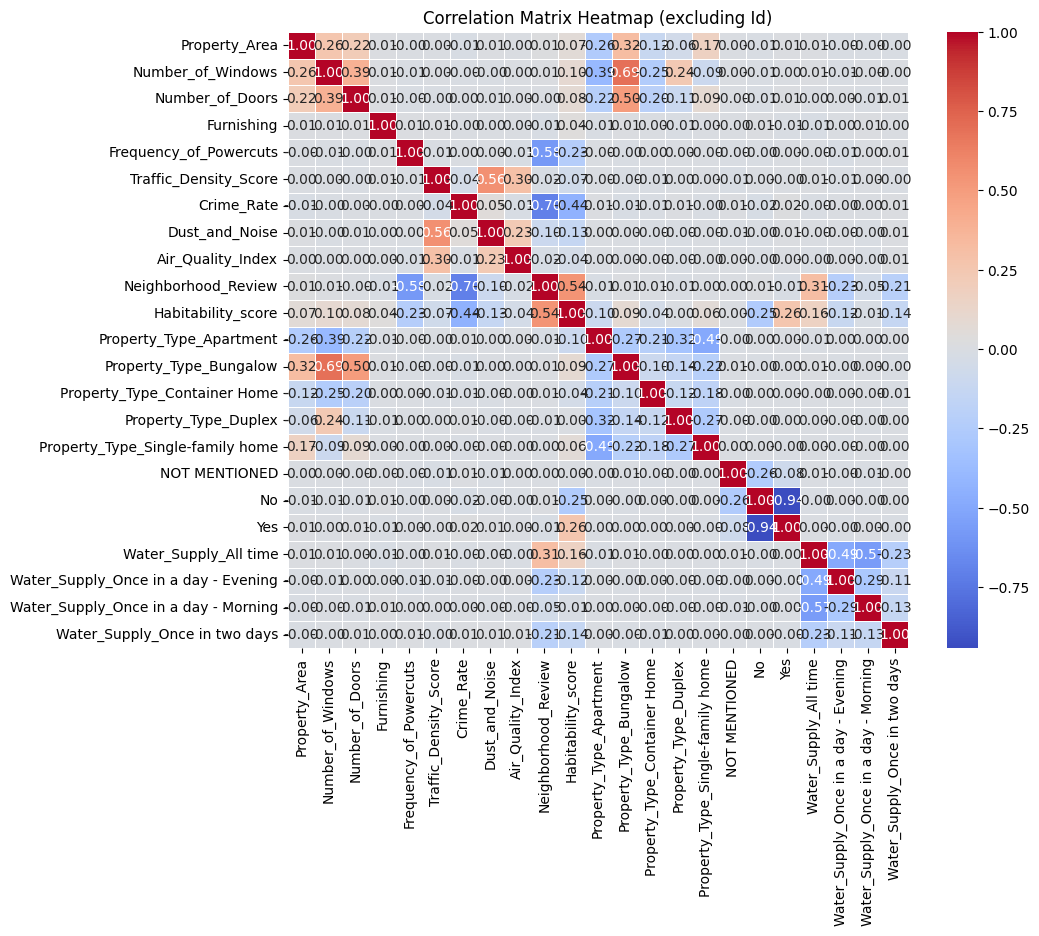

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap (excluding Id)')
plt.show()

In [22]:
df_house_new['Property_Area'].dtype

dtype('int64')

# Scaling

In [23]:
df_house_scaled=df_house_new

In [24]:
from sklearn.preprocessing import MinMaxScaler

# Assuming df is your DataFrame containing all features

# Initialize MinMaxScaler
#scaler = MinMaxScaler()

# Fit and transform the entire dataset
#scaled_data = scaler.fit_transform(df_house_new[['Property_Area','Air_Quality_Index']])

# Convert the scaled data back to a DataFrame (optional)
#df_house_scaled = pd.DataFrame(scaled_data, columns=df_house_new.columns)


features_to_scale = ['Property_Area','Air_Quality_Index']

scaler = MinMaxScaler()

# Fit the scaler on the selected features
scaler.fit(df_house_new[features_to_scale])

# Transform the selected features
df_scaled = scaler.transform(df_house_new[features_to_scale])

# Replace the original values with the scaled values in the DataFrame
df_house_scaled[features_to_scale] = df_scaled

In [25]:
print(df_house_scaled.head())

   Property_Area  Number_of_Windows  Number_of_Doors  Furnishing  \
0       0.000215                4.0                1           1   
1       0.022636                2.0                2           2   
2       0.022779                4.0                2           3   
3       0.028608                3.0                2           2   
4       0.076455               14.0                6           3   

   Frequency_of_Powercuts  Traffic_Density_Score  Crime_Rate  Dust_and_Noise  \
0                     0.0                   5.89           2               2   
1                     1.0                   4.37           1               2   
2                     0.0                   7.45           2               2   
3                     2.0                   6.16           4               2   
4                     0.0                   5.46           1               2   

   Air_Quality_Index  Neighborhood_Review  ...  Property_Type_Container Home  \
0           0.086207          

# Regression 

In [26]:
#df_house_scaled.head(20)
#print(df_house.isnull().sum())
#All the nan values have been replaced by median and mode


In [27]:
#f#rom sklearn.model_selection import train_test_split


#X_train = df_house_scaled.drop('Habitability_score', axis=1)  # Exclude the target column

# Select the target variable for y_train
#y_train = df_house_scaled['Habitability_score']  # Select only the target column

# Split the original training data into a new training set and a validation set
#X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)



# import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
# #from sklearn.model_selection import cross_val_score
# #from sklearn.metrics import make_scorer
# from sklearn.model_selection import GridSearchCV

X = df_house_scaled.drop('Habitability_score', axis=1)
y = df_house_scaled['Habitability_score']


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.ensemble import RandomForestRegressor


# Define the Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)


# Train the Random Forest model
rf_regressor.fit(X_train, y_train)


# Predict on the testing set
y_pred_rf = rf_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print("Mean Squared Error (MSE) using Random Forest:", mse_rf)
# # Define XGBoost regressor
# xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# # Train the XGBoost model
# xgb_regressor.fit(X_train, y_train)

# # Predict on the testing set
# y_pred = xgb_regressor.predict(X_test)

# # Calculate root mean squared error (RMSE)
# rmse = mean_squared_error(y_test, y_pred, squared=False)
# print("Root Mean Squared Error:", rmse)


# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

# from sklearn.model_selection import train_test_split

# X= df_house_scaled.drop('Habitability_score', axis=1) 
# y = df_house_scaled['Habitability_score']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Convert DataFrames to NumPy arrays and exclude the first column
# X_train = X_train.iloc[:, 1:].values
# X_test = X_test.iloc[:, 1:].values
# y_train = y_train.values
# y_test= y_test.values

# import numpy as np

# # Convert True and False values to 1s and 0s in X_train_array and X_test_array
# X_train_array = np.where(X_train, 1, 0)
# X_test_array = np.where(X_test, 1, 0)

# # Convert True and False values to 1s and 0s in y_train_array and y_test_array
# y_train_array = y_train.astype(int)
# y_test_array = y_test.astype(int)
# # Define the neural network model
# model = Sequential([
#     Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
#     Dense(64, activation='relu'),
#     Dense(1)  # Output layer with one neuron (regression)
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error')

# # Train the model
# model.fit(X_train_array, y_train_array, epochs=50, batch_size=32, verbose=0)

# # Evaluate the model on the test set
# loss = model.evaluate(X_test_array, y_test_array, verbose=0)
# print("Mean Squared Error (MSE) using Neural Network:", loss)

# print(X_train_array)


 

Mean Squared Error (MSE) using Random Forest: 35.37735484178165


In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Define Random Forest regressor
#rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive and calculate RMSE
cv_rmse_scores = np.sqrt(-cv_scores)

# Print cross-validation RMSE scores
print("Cross-Validation RMSE Scores:", cv_rmse_scores)

# Calculate mean RMSE
mean_cv_rmse = np.mean(cv_rmse_scores)
print("Mean Cross-Validation RMSE:", mean_cv_rmse)

Cross-Validation RMSE Scores: [5.95624744 6.00676462 6.04598159 6.09833373 6.09907868]
Mean Cross-Validation RMSE: 6.0412812113432155


In [29]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestRegressor

 
# # Define hyperparameters to search
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 5, 10],
#     'min_samples_split': [2, 5, 10]
# }

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters
# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

# # Refit the model with the best hyperparameters
# best_model = grid_search.best_estimator_
# best_model.fit(X_train, y_train)

# # Evaluate the model on the test set
# mse = mean_squared_error(y_test, best_model.predict(X_test))
# print("Mean Squared Error (MSE) on Test Set:", mse)


In [30]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define Random Forest regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Define hyperparameters to search
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(estimator=rf_regressor, param_distributions=param_distributions, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Refit the model with the best hyperparameters
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)

# Evaluate the model on the test set
mse = mean_squared_error(y_test, best_model.predict(X_test))
print("Mean Squared Error (MSE) on Test Set:", mse)

Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 10, 'max_depth': None}
Mean Squared Error (MSE) on Test Set: 34.96426984750313


In [31]:

#from sklearn.linear_model import LinearRegression
#model = LinearRegression()

# Fit the model to the training data
#model.fit(X_train_new, y_train_new)

In [32]:
#X_test =test_data.drop('Habitability_score', axis=1)  # Exclude the target column

# Select the target variable for y_train
#y_test =test_data['Habitability_score']  # Select only the target column

#from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.metrics import mean_squared_error
#from math import sqrt

# Model Evaluation
#y_pred = model.predict(X_val)

# Mean Squared Error and R-squared for model evaluation
#mse = mean_squared_error(y_val, y_pred)
# Calculate the root mean squared error

#rmse = sqrt(mse)


#r2 = r2_score(y_val, y_pred)

#print("Rmse:", rmse)
#print("R-squared:", r2)

# ****TESTING

In [33]:
test_dataframe = pd.read_csv("/kaggle/input/ml-olympiad-sustainable-urban-living/test.csv")

In [34]:
# Identify numeric and categorical columns
numeric_columns = test_dataframe.select_dtypes(include=['number']).columns.tolist()
categorical_columns = test_dataframe.select_dtypes(include=['object', 'category']).columns.tolist()

print(len(numeric_columns))
print(len(categorical_columns))

7
7


In [35]:
for col in numeric_columns:
    test_dataframe.fillna({col:test_dataframe[col].median()}, inplace=True)

# Fill missing values for categorical columns with mode
for col in categorical_columns:
    test_dataframe.fillna({col:test_dataframe[col].mode()[0]}, inplace=True)

In [36]:
#Property_Type- Lable encoding  1,2,3,4,5,6
#unique_values_1 = test_dataframe['Property_Type'].unique()
#print(unique_values_1)

# Mapping dictionary
#mapping = {"Apartment": 1, "Bungalow": 2,"Single-family home": 3, "Duplex": 4, "#R%$G&867":5, "Container Home": 6}

#test_dataframe["Property_Type"] = test_dataframe["Property_Type"].map(mapping)


#test_dataframe.rename(columns={"Property_Type": "Property_Type"}, inplace=True)

#print(test_dataframe["Property_Type"])


test_dataframe = pd.concat([test_dataframe, pd.get_dummies(test_dataframe['Property_Type'], prefix='Property_Type')], axis=1)
test_dataframe.drop('Property_Type', axis=1, inplace=True)
test_dataframe.drop('Property_Type_#R%$G&867', axis=1, inplace=True)



In [37]:
# Furnishing- ordinal encoding 
#Semi_Furnished -1
#Unfurnished-2
#Fully Furnished-3
unique_values_2=test_dataframe['Furnishing'].unique()
print(unique_values_2)

# Mapping dictionary
mapping = {"Semi_Furnished": 1, "Unfurnished": 2,"Fully Furnished": 3 }

test_dataframe["Furnishing"] = test_dataframe["Furnishing"].map(mapping)


test_dataframe.rename(columns={"Furnishing": "Furnishing"}, inplace=True)

print(test_dataframe["Furnishing"])

['Unfurnished' 'Semi_Furnished' 'Fully Furnished']
0       2
1       1
2       2
3       1
4       3
       ..
7895    1
7896    3
7897    2
7898    1
7899    3
Name: Furnishing, Length: 7900, dtype: int64


In [38]:
# Power_Backup-One hot encoder
unique_values_3=test_dataframe['Power_Backup'].unique()
print(unique_values_3)


['No' 'Yes' 'NOT MENTIONED']


In [39]:
one_hot_encoded = pd.get_dummies(test_dataframe['Power_Backup'])

 #Concatenate the one-hot encoded columns with the original DataFrame
test_dataframe = pd.concat([test_dataframe.drop('Power_Backup', axis=1), one_hot_encoded], axis=1)

print(test_dataframe.head())

       Id  Property_Area  Number_of_Windows  Number_of_Doors  Furnishing  \
0  0x6808           1521                5.0                1           2   
1  0x6a98           2233                2.0                1           1   
2  0xacc0            986                1.0                1           2   
3  0x8225           1625                2.0                1           1   
4  0xaee8           1166                2.0                2           3   

   Frequency_of_Powercuts             Water_Supply  Traffic_Density_Score  \
0                     0.0                 All time                   7.61   
1                     0.0  Once in a day - Morning                   5.28   
2                     0.0                 All time                   7.72   
3                     0.0  Once in a day - Evening                   6.19   
4                     0.0  Once in a day - Evening                   5.84   

               Crime_Rate Dust_and_Noise  Air_Quality_Index  \
0      Well below

In [40]:
# Water_Supply- lable encoding
#Once in a day - Morning  -1
#Once in a day - Evening  -2
#All time- 3
#NOT MENTIONED -0
#Once in two days -4
#unique_values_4=test_dataframe['Water_Supply'].unique()
#print(unique_values_4)

# Mapping dictionary
#mapping = {"Once in a day - Morning": 1, "Once in a day - Evening": 2,"All time": 3, "Once in two days": 4, "NOT MENTIONED":0 }

#test_dataframe["Water_Supply"] = test_dataframe["Water_Supply"].map(mapping)


#test_dataframe.rename(columns={"Water_Supply": "Water_Supply"}, inplace=True)

#print(test_dataframe["Water_Supply"])

test_dataframe = pd.concat([test_dataframe, pd.get_dummies(test_dataframe['Water_Supply'], prefix='Water_Supply')], axis=1)
test_dataframe.drop('Water_Supply', axis=1, inplace=True)
test_dataframe.drop('Water_Supply_NOT MENTIONED', axis=1, inplace=True)


In [41]:
# Crime_Rate- Ordinal encoding 
#Slightly below average-1
#Well below average-2
#Well above average-3
#Slightly above average-4
unique_values_6=test_dataframe['Crime_Rate'].unique()
print(unique_values_6)

# Mapping dictionary
mapping = {"Slightly below average":2, "Well below average": 1,"Well above average": 4, "Slightly above average": 3 }

test_dataframe["Crime_Rate"] = test_dataframe["Crime_Rate"].map(mapping)


test_dataframe.rename(columns={"Crime_Rate": "Crime_Rate"}, inplace=True)

print(test_dataframe["Crime_Rate"])

['Well below average' 'Slightly below average' 'Slightly above average'
 'Well above average']
0       1
1       1
2       1
3       1
4       2
       ..
7895    3
7896    3
7897    1
7898    3
7899    1
Name: Crime_Rate, Length: 7900, dtype: int64


In [42]:
# Dust_and_Noise- Ordinal encoding
#  'Low''Medium' 'High' = 1,2,3
unique_values_7=test_dataframe['Dust_and_Noise'].unique()
print(unique_values_7)

# Mapping dictionary
mapping = {"Low": 1, "Medium": 2,"High": 3 }

test_dataframe["Dust_and_Noise"] = test_dataframe["Dust_and_Noise"].map(mapping)


test_dataframe.rename(columns={"Dust_and_Noise": "Dust_and_Noise"}, inplace=True)

print(test_dataframe["Dust_and_Noise"])

['Medium' 'Low' 'High']
0       2
1       2
2       2
3       2
4       2
       ..
7895    2
7896    2
7897    2
7898    2
7899    3
Name: Dust_and_Noise, Length: 7900, dtype: int64


In [43]:
# Identify numeric and categorical columns
numeric_columns = test_dataframe.select_dtypes(include=['number']).columns.tolist()
categorical_columns = test_dataframe.select_dtypes(include=['object', 'category']).columns.tolist()

print(len(numeric_columns))
print(len(categorical_columns))

print(categorical_columns)

10
1
['Id']


In [44]:
test_dataframe_new = test_dataframe.drop('Id', axis=1)
test_scaled=test_dataframe_new

In [45]:
test_scaled.head(20)

,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,...,Property_Type_Container Home,Property_Type_Duplex,Property_Type_Single-family home,NOT MENTIONED,No,Yes,Water_Supply_All time,Water_Supply_Once in a day - Evening,Water_Supply_Once in a day - Morning,Water_Supply_Once in two days
0,1521,5.0,1,2,0.0,7.61,1,2,156.0,4.71,...,False,False,True,False,True,False,True,False,False,False
1,2233,2.0,1,1,0.0,5.28,1,2,82.0,4.50,...,False,False,True,False,True,False,False,False,True,False
2,986,1.0,1,2,0.0,7.72,1,2,91.0,4.79,...,False,False,False,False,True,False,True,False,False,False
3,1625,2.0,1,1,0.0,6.19,1,2,159.0,4.09,...,False,False,True,False,True,False,False,True,False,False
4,1166,2.0,2,3,0.0,5.84,2,2,82.0,3.56,...,False,False,True,False,True,False,False,True,False,False
5,1883,5.0,5,3,0.0,6.90,1,2,151.0,4.72,...,False,False,False,False,True,False,True,False,False,False
6,880,2.0,2,1,0.0,5.59,2,2,97.0,3.54,...,False,False,False,False,False,True,True,False,False,False
7,350,3.0,2,2,0.0,7.34,1,2,102.0,4.78,...,False,False,False,False,True,False,True,False,False,False
8,661,1.0,3,2,1.0,7.36,1,2,90.0,3.85,...,False,False,False,False,True,False,False,False,True,False
9,2147,5.0,4,1,0.0,6.96,1,2,123.0,4.76,...,False,False,False,False,True,False,True,False,False,False


In [46]:
from sklearn.preprocessing import MinMaxScaler

# Assuming df is your DataFrame containing all features

#test_dataframe_new = test_dataframe.drop('Id', axis=1)
# Initialize MinMaxScaler
#scaler = MinMaxScaler()

# Fit and transform the entire dataset
#scaled_data = scaler.fit_transform(test_dataframe_new)

# Convert the scaled data back to a DataFrame (optional)
#test_scaled = pd.DataFrame(scaled_data, columns=test_dataframe_new.columns)

In [47]:
test_scaled.head(20)
print(test_scaled.isnull().sum())
#All the nan values have been replaced by median and mode


Property_Area                           0
Number_of_Windows                       0
Number_of_Doors                         0
Furnishing                              0
Frequency_of_Powercuts                  0
Traffic_Density_Score                   0
Crime_Rate                              0
Dust_and_Noise                          0
Air_Quality_Index                       0
Neighborhood_Review                     0
Property_Type_Apartment                 0
Property_Type_Bungalow                  0
Property_Type_Container Home            0
Property_Type_Duplex                    0
Property_Type_Single-family home        0
NOT MENTIONED                           0
No                                      0
Yes                                     0
Water_Supply_All time                   0
Water_Supply_Once in a day - Evening    0
Water_Supply_Once in a day - Morning    0
Water_Supply_Once in two days           0
dtype: int64


In [48]:
X_test=test_scaled
y_pred_new =best_model.predict(X_test)

In [49]:
test_dataframe['Habitability_score'] = y_pred_new



test_dataframe.head()

,Id,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,...,Property_Type_Duplex,Property_Type_Single-family home,NOT MENTIONED,No,Yes,Water_Supply_All time,Water_Supply_Once in a day - Evening,Water_Supply_Once in a day - Morning,Water_Supply_Once in two days,Habitability_score
0,0x6808,1521,5.0,1,2,0.0,7.61,1,2,156.0,...,False,True,False,True,False,True,False,False,False,76.253790
1,0x6a98,2233,2.0,1,1,0.0,5.28,1,2,82.0,...,False,True,False,True,False,False,False,True,False,81.215557
2,0xacc0,986,1.0,1,2,0.0,7.72,1,2,91.0,...,False,False,False,True,False,True,False,False,False,74.404895
3,0x8225,1625,2.0,1,1,0.0,6.19,1,2,159.0,...,False,True,False,True,False,False,True,False,False,80.300815
4,0xaee8,1166,2.0,2,3,0.0,5.84,2,2,82.0,...,False,True,False,True,False,False,True,False,False,74.705366


In [50]:
new_df=test_dataframe[['Id','Habitability_score']]

print(new_df.head(30))

new_df.to_csv('new_dataframe.csv', index=False)

        Id  Habitability_score
0   0x6808           76.253790
1   0x6a98           81.215557
2   0xacc0           74.404895
3   0x8225           80.300815
4   0xaee8           74.705366
5   0xbc8c           89.809740
6   0x610e           74.064264
7   0x62e8           74.655321
8   0x818e           58.865430
9   0x6dc0           78.397919
10  0x15a6           78.649699
11   0x675           41.005479
12  0x6e24           73.820806
13  0x3004           75.477245
14  0x6aeb           78.655777
15  0xc36b           45.118148
16  0x17fc           81.361243
17  0x58a5           67.109621
18  0x6567           76.779391
19  0x455a           76.498241
20  0xa5f9           41.356941
21  0x5913           79.353099
22  0x1153           88.692130
23  0xbe16           90.821868
24  0xb98c           78.695463
25  0x6a2e           70.997200
26  0x11a9           76.603656
27  0x28ab           84.029501
28  0x878a           79.357504
29  0x5c90           75.787404


In [51]:
print('Done')

Done
